### Test1: Create a Infinite Line

In [1]:
import gemmini as gm

a = gm.Line2D((1,0), slope=1.5)
assert a.grad() == 1.5

b = gm.Line2D((-1,0), (0,2))
assert b.grad() == 2

### Test2: Relation Between Two Lines

In [2]:
a = gm.Line2D((1,0), slope=1.5)
b = gm.Line2D((3, 3), slope=1.5)
c = gm.Line2D((-1,0), (0,2))
d = gm.Line2D((0, 0), slope=1.5)
e = gm.Line2D((0, 0), (-2, 1))

assert a == b
assert a != c
assert a.parallel(d)
assert not a.parallel(c)
assert c.orthog(e)

### Test3: Find intersection

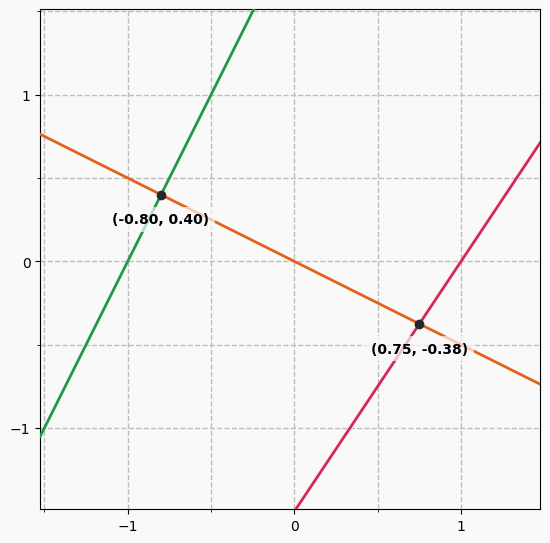

In [3]:
canva = gm.Canvas(scale=1.5)

a = gm.Line2D((1,0), slope=1.5)
b = gm.Line2D((-1,0), (0,2))
c = gm.Line2D((0, 0), (-2, 1))

x, y = b.intersect(c)
assert (abs(x - (-0.8)) <= 1e-6 and abs(y-0.4) <= 1e-6)
canva.add(gem=[x, y])

x, y = a & c
assert (abs(x - 3/4) <= 1e-6 and abs(y - (-3/8)) <= 1e-6)
canva.add(gem=[x, y])

canva.add((a, b, c))
canva.plot()

### Test4: Line segment (Line that has endpoints)

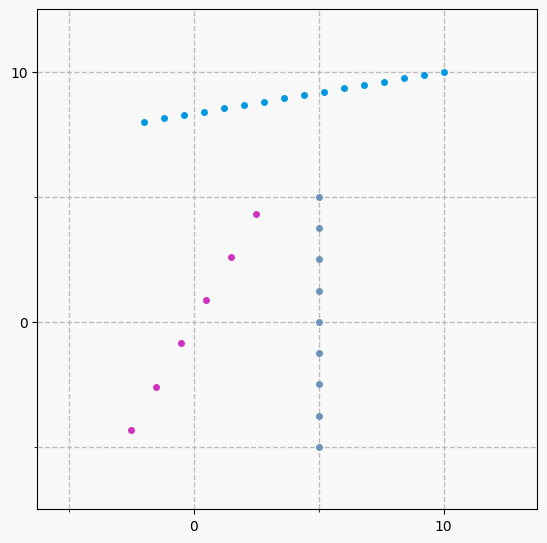

In [7]:
from math import pi

canva = gm.Canvas()

a = gm.Segment(p1=(-2,8), p2=(10,10))
b = gm.Segment(size=10, slope=pi/3, n=6)
c = gm.Segment((5, 5), (5, -5), 9)

canva.add((a, b, c))
canva.plot()

### Test5: Find Intersection between a Line and a Segment 

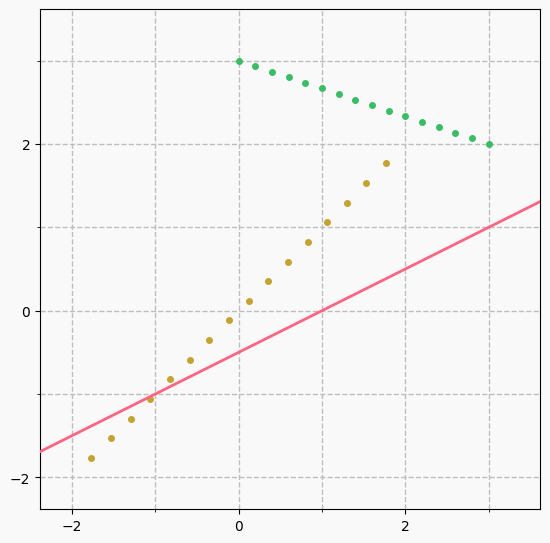

In [5]:
canva = gm.Canvas()
a = gm.Line2D((1, 0), slope=1/2)
sa = gm.Segment(p1=(0,3), p2=(3,2))
sb = gm.Segment(size=5, slope=pi/4)

assert a.on(sa) == False
assert a.on(sb) == True

canva.add((a, sa, sb))
canva.plot()

### Test6: Check a point is on a Line

In [8]:
a = gm.Line2D((0, 0), slope=1.5)

assert a.on((2, 3)) == True
assert a.on((3, 2)) == False

### Test7: Find Intersection between a Line and other geometry

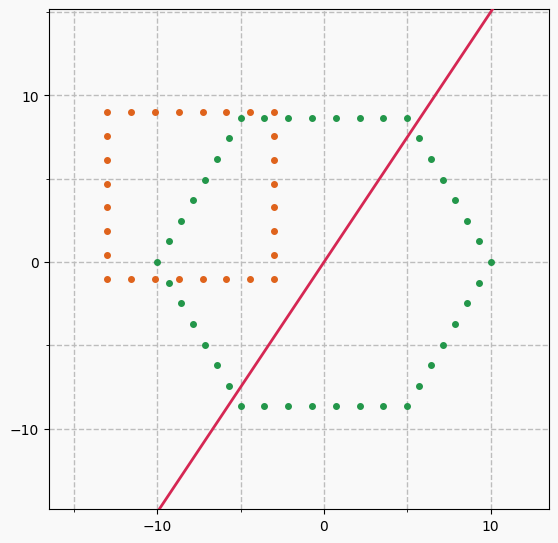

In [9]:
canva = gm.Canvas()
a = gm.Line2D((0, 0), slope=1.5)

ga = gm.RegularPolygon(s=10, v=6)
gb = gm.RegularPolygon(s=10, v=4)
gb.translate(-8, 4)

assert len(a.intersect(ga)) == 2
assert len(a.intersect(gb)) == 0

assert a.on(ga) == True
assert a.on(gb) == False

canva.add(a)
canva.add(ga)
canva.add(gb)
canva.plot()